In [7]:
import cv2
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

RECT_PATH = "rect.jpeg"
img = cv2.imread(RECT_PATH)

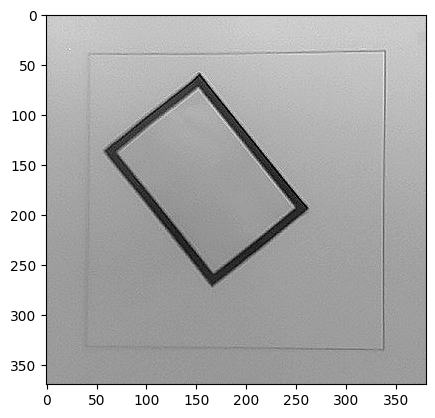

In [8]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharped = cv2.filter2D(grey, -1, kernel)
plt.imshow(sharped, cmap='gray')

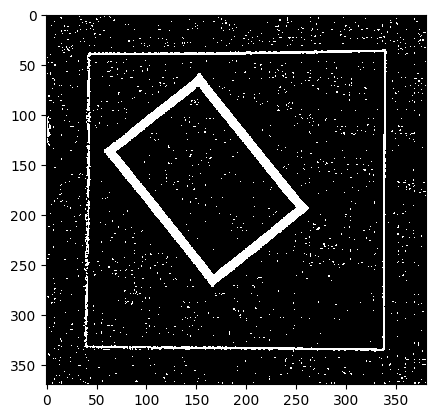

In [9]:
adp = cv2.adaptiveThreshold(grey, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 17, 2)
plt.imshow(adp, cmap='gray')

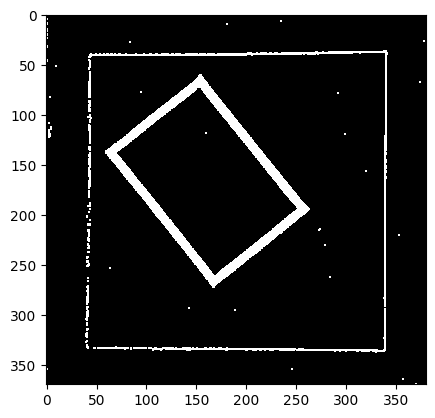

In [10]:
kernel = np.ones((2,2), np.uint8)
opened = cv2.morphologyEx(adp, cv2.MORPH_OPEN, kernel)
plt.imshow(opened, cmap='gray')

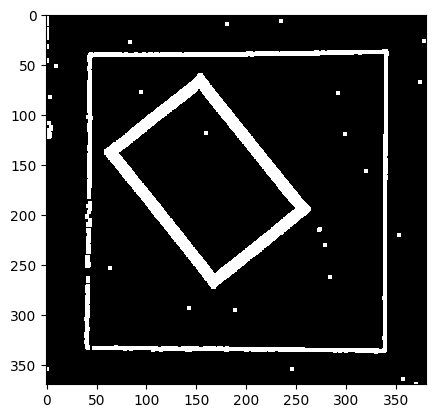

In [11]:
kernel = np.ones((12,12),np.uint8)
dilated = cv2.dilate(opened, None, iterations=1)
plt.imshow(dilated, cmap='gray')


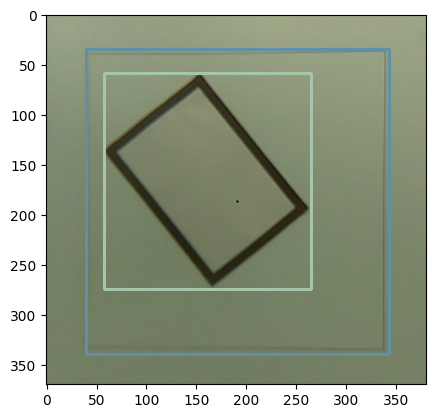

In [12]:
import random

res = img.copy()
contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.BORDER_REFLECT)
# https://docs.opencv.org/4.8.0/d4/d73/tutorial_py_contours_begin.html
# https://docs.opencv.org/4.8.0/d3/dc0/group__imgproc__shape.html#ga17ed9f5d79ae97bd4c7cf18403e1689a
# https://docs.opencv.org/4.8.0/dd/d49/tutorial_py_contour_features.html?loclr=blogmap

rects = []
for c in contours:
    rect = cv2.boundingRect(c)
    # https://docs.opencv.org/4.8.0/d2/d44/classcv_1_1Rect__.html
    x, y, w, h = rect
    if w < 100 or h < 100:
        continue
    # generate random color
    b = random.randint(0, 255)
    g = random.randint(0, 255)
    r = random.randint(0, 255)
    cv2.rectangle(res, (x, y), (x + w, y + h), (b, g, r), 2)
    rects.append(rect)

max_rect = max(rects, key=lambda x: x[2] * x[3])
origin_point = (max_rect[0] + max_rect[2] // 2, max_rect[1] + max_rect[3] // 2)
cv2.circle(res, origin_point, 1, (0, 0, 255), -1)
plt.imshow(res)